# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных

#### Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

#### Таблица calls (информация о звонках):
id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):
id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):
tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Оглавление

#### [1. Открытие файлов с данными и изучение общей информации](#step1)

   [1.1. Чтение файлов и просмотр общей информации о датасетах](#step1.1)
    
   [1.2. Вывод и постановка задач на предобработку](#step1.2)
    
#### [2. Предобработка данных](#step2)

   [2.1. Изменение типа данных на datetime в столбцах - 'call_date', 'session_date', 'message_date', 'reg_date' и 'churn_date''](#step2.1)
   
   [2.2 Округлить вверх до целого значения столбцов 'duration' и 'mb_used'](#step2.2)
   
   [2.3 Изменить тип данных на минимально подходящий int в столбцах - 'duration', 'mb_used', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute' и 'age'](#step2.3)
   
   [2.4 Удалить данные с нулевыми звонками и интернет-сессиями](#step2.4)
   
   [2.5 Посчитать количество сделанных звонков и израсходованных минут разговора по месяцам](#step2.5)
   
   [2.6 Посчитать количество отправленных сообщений по месяцам](#step2.6)
   
   [2.7 Посчитать объем израсходованного интернет-трафика по месяцам](#step2.7)
   
   [2.8 Посчитать помесячную выручку с каждого пользователя](#step2.8)
   
   [2.9 Итоги](#step2.9)
   
#### [3. Анализ данных. Описание поведения клиента](#step3)
   
   [3.1 Сколько минут, смс и интернет-трафика требуется пользователям каждого тарифа в месяц](#step3.1)
   
   [3.2 Подсчет среднего кол-ва, дисперсии и стандартного отклонения](#step3.2)
   
   [3.3 Построение гистограмм и описание распределения](#step3.3)
     
#### [4. Проверка гипотез](#step4)
   
   [4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#step4.1)
   
   [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#step4.2)
   
   [4.3 Средняя выручка пользователей тарифом Smart  из Москвы отличается от выручки пользователей тарифом Smart из других регионов](#step4.3)
   
   [4.4 Средняя выручка пользователей тарифом Ultra  из Москвы отличается от выручки пользователей тарифом Ultra из других регионов](#step4.4)
   
#### [5. Общие выводы](#step5)  


### 1. Открытие файлов с данными и изучение общей информации<a id="step1"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### 1.1 Чтение файлов и просмотр общей информации о датасетах<a id="step1.1"></a> 

In [2]:
calls = pd.read_csv('/datasets/calls.csv', sep=',')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.sample(10)

,id,call_date,duration,user_id
184612,1457_584,2018-10-25,5.82,1457
113191,1290_369,2018-09-15,7.34,1290
41893,1102_320,2018-10-31,2.71,1102
117486,1302_126,2018-07-19,13.47,1302
167903,1414_23,2018-06-02,1.32,1414
182405,1454_157,2018-08-13,0.00,1454
109313,1282_207,2018-07-04,0.00,1282
101309,1260_473,2018-09-14,23.46,1260
197985,1484_142,2018-08-18,12.51,1484
47486,1118_775,2018-04-04,1.95,1118


In [4]:
print("Количество уникальных звонков:", calls['id'].count())
print("Количество дубликатов:", calls.duplicated().sum())

Количество уникальных звонков: 202607
Количество дубликатов: 0


Представлены данные о 202607 звонках. Пропущенных значений нет, дубликатов тоже нет. В условии сказано, что длительность звонка округляется до целой минуты, соответственно нужно будет обработать столбец 'duration' - округлить значения вверх до целого и привести данные к целочисленному типу. Также есть звонки длительностью 0.00 минут, скорее всего это пропущенные звонки. Такие строки буду удалять, так как они не влияют на выручку и не расходуют пакетных лимитов. Столбец 'call_date' имеет некорректный тип данных, изменю на datetime.

In [5]:
internet = pd.read_csv('/datasets/internet.csv', sep=',')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
73609,73609,1248_178,535.50,2018-11-17,1248
89639,89639,1302_439,10.94,2018-08-31,1302
83211,83211,1282_285,486.95,2018-01-23,1282
14019,14019,1049_3,369.98,2018-08-06,1049
56174,56174,1187_218,355.67,2018-12-02,1187
137298,137298,1460_233,199.08,2018-06-12,1460
140204,140204,1471_87,0.00,2018-05-09,1471
102551,102551,1344_132,854.13,2018-04-30,1344
36888,36888,1127_238,33.11,2018-06-22,1127
35309,35309,1123_273,319.32,2018-11-30,1123


In [7]:
print("Количество уникальных интернет-сессий:", internet['id'].count())
print("Количество дубликатов:", internet.duplicated().sum())

Количество уникальных интернет-сессий: 149396
Количество дубликатов: 0


Представлены данные о 149396 интернет-сессиях. Пропущенных значений нет, дубликатов тоже нет. Здесь аналогично со звонками по условию требуется округление длины сессий (столбец 'mb_used') до целого значения, после чего можно изменить тип данных на целочисленный. Также есть сессии длительностью 0.00 Мб, скорее всего было прерывание интернет-соединения сразу после подключения. Аналогично нулевым звонкам строки с нулевыми сессиями буду удалять, так как они не влияют на выручку. Столбец 'session_date' имеет некорректный тип данных, изменю на datetime.

In [8]:
messages = pd.read_csv('/datasets/messages.csv', sep=',')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages.sample(10)

,id,message_date,user_id
9069,1035_304,2018-07-24,1035
109900,1441_65,2018-11-15,1441
96448,1396_99,2018-08-07,1396
111535,1451_114,2018-09-03,1451
34679,1149_491,2018-08-22,1149
22360,1093_242,2018-09-16,1093
30139,1130_514,2018-11-06,1130
753,1003_187,2018-11-19,1003
20860,1089_863,2018-09-06,1089
79546,1332_166,2018-10-23,1332


In [10]:
print("Количество уникальных интернет-сессий:", messages['id'].count())
print("Количество дубликатов:", messages.duplicated().sum())

Количество уникальных интернет-сессий: 123036
Количество дубликатов: 0


Представлены данные о 123036 смс. Пропущенных значений нет, дубликатов тоже нет. Здесь необходимо изменить тип данных столбца 'message_date' на datetime.

In [11]:
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация о тарифах представлена максимально понятно, всего 2 тарифа. В целях экономии памяти переведу типы значений в минимально подходящие 'int'.

In [13]:
users = pd.read_csv('/datasets/users.csv', sep=',')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
210,1210,33,NaN,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart
28,1028,20,NaN,Тверь,Рустем,Евсеев,2018-10-02,ultra
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart
124,1124,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra
140,1140,22,NaN,Киров,Леонид,Ахматулин,2018-12-31,smart
356,1356,75,NaN,Москва,Евгений,Гончаров,2018-04-18,ultra
227,1227,66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart
190,1190,65,NaN,Москва,Рауль,Абоимов,2018-12-07,smart
208,1208,69,NaN,Пермь,Ева,Сахарова,2018-03-24,ultra
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart


In [15]:
print("Количество уникальных пользователей:", users['user_id'].count())
print("Количество дубликатов:", users.duplicated().sum())

Количество уникальных пользователей: 500
Количество дубликатов: 0


Представлены данные о 500 пользователях. Дубликатов нет. Есть пропуски в столбце с датой прекращения использования тарифа, но по условию сказано, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Оставлю данные как есть, так как эти пропуски не помешают мне в решении задачи. И, как и в предыдущих датасетах наведу порядок в типах данных.

#### 1.2. Вывод и постановка задач на предобработку<a id="step1.2"></a> 

Итак, в целом представлены данные в хорошем состоянии. Имеется 5 датасетов - инфо о пользователях, звонках, интернет-сессиях, смс и тарифах. Дубликатов не обнаружено ни в одном датасете. Данные полные, за исключением даты прекращения пользования тарифом (но, это логично, так как тарифом продолжают пользоваться). Есть несколько задач, которые буду решать в предобработке:

1. Изменить тип данных на datetime в столбцах - 'call_date', 'session_date', 'message_date', 'reg_date' и 'churn_date'.

2. Округлить вверх до целого значения столбцов 'duration' и 'mb_use'.

3. Изменить тип данных на минимально подходящий int в столбцах - 'duration', 'mb_used', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute' и 'age'.

4. Удалить данные с нулевыми звонками и интернет-сессиями.

5. Посчитать количество сделанных звонков и израсходованных минут разговора по месяцам

6. Посчитать количество отправленных сообщений по месяцам

7. Посчитать объем израсходованного интернет-трафика по месяцам

8. Посчитать помесячную выручку с каждого пользователя

### 2. Предобработка данных<a id="step2"></a> 

#### 2.1 Изменение типа данных на datetime в столбцах - 'call_date', 'session_date', 'message_date', 'reg_date' и 'churn_date''<a id="step2.1"></a> 

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Проверю, во всех ли столбцах изменились типы - выведу инфо

In [17]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### 2.2 Округлить вверх до целого значения столбцов 'duration' и 'mb_used'<a id="step2.2"></a> 

Округление произведу при помощи функции ceil(), так как она возвращает наименьшее целое число не меньше, чем исходное.

In [21]:
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [22]:
calls.sample(10)

,id,call_date,duration,user_id
36175,1089_648,2018-11-10,0.0,1089
185110,1458_402,2018-10-23,5.0,1458
165718,1409_343,2018-03-27,8.0,1409
128169,1330_33,2018-10-15,15.0,1330
162592,1401_27,2018-07-01,4.0,1401
39871,1099_244,2018-04-29,0.0,1099
68188,1172_393,2018-07-19,0.0,1172
96271,1245_30,2018-09-10,3.0,1245
122337,1315_360,2018-10-19,0.0,1315
14486,1038_108,2018-10-14,1.0,1038


In [23]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
38969,38969,1135_449,500.0,2018-09-19,1135
98821,98821,1331_345,98.0,2018-05-29,1331
859,859,1004_79,0.0,2018-09-17,1004
145815,145815,1487_158,342.0,2018-11-30,1487
83888,83888,1284_242,288.0,2018-03-17,1284
35033,35033,1122_36,411.0,2018-12-18,1122
77209,77209,1261_77,526.0,2018-12-21,1261
22109,22109,1073_87,416.0,2018-10-07,1073
25532,25532,1088_167,0.0,2018-08-07,1088
108835,108835,1372_203,583.0,2018-05-11,1372


Теперь можно менять тип данных в этих столбцах на целочисленный.

#### 2.3 Изменить тип данных на минимально подходящий int в столбцах - 'duration', 'mb_used', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute' и 'age'<a id="step2.3"></a> 

Посмотрю максимальные значения, чтобы определить минимально подходящий 'int'

In [24]:
calls['duration'].max()

38.0

In [25]:
internet['mb_used'].max()

1725.0

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [27]:
users['age'].max()

75

Итак, поменяю тип данных:

'duration' на 'int8'

'mb_used' на 'int16'

'messages_included' на 'int16'

'mb_per_month_included' на 'int16'

'minutes_included' на 'int16'

'rub_monthly_fee' на 'int16'

'rub_per_gb' на 'int16'

'rub_per_message' на 'int8'

'rub_per_minute' на 'int8'

'age' на 'int8'

In [28]:
calls['duration'] = calls['duration'].astype('int8')
internet['mb_used'] = internet['mb_used'].astype('int16')
tariffs['messages_included'] = tariffs['messages_included'].astype('int16')
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('int16')
tariffs['minutes_included'] = tariffs['minutes_included'].astype('int16')
tariffs['rub_monthly_fee'] = tariffs['rub_monthly_fee'].astype('int16')
tariffs['rub_per_gb'] = tariffs['rub_per_gb'].astype('int16')
tariffs['rub_per_message'] = tariffs['rub_per_message'].astype('int8')
tariffs['rub_per_minute'] = tariffs['rub_per_minute'].astype('int8')
users['age'] = users['age'].astype('int8')

In [29]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int8
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(1), int8(1), object(1)
memory usage: 4.8+ MB


In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int16(1), int64(2), object(1)
memory usage: 4.8+ MB


In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int8
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), int8(1), object(4)
memory usage: 28.0+ KB


In [32]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int16
mb_per_month_included    2 non-null int16
minutes_included         2 non-null int16
rub_monthly_fee          2 non-null int16
rub_per_gb               2 non-null int16
rub_per_message          2 non-null int8
rub_per_minute           2 non-null int8
tariff_name              2 non-null object
dtypes: int16(5), int8(2), object(1)
memory usage: 168.0+ bytes


Все типы данных теперь корректны.

#### 2.4 Удалить данные с нулевыми звонками и интернет-сессиями<a id="step2.4"></a> 

Перед удалением посмотрю, сколько в данных нулевых звонков и интернет-сессий

In [33]:
calls_null = calls.query('duration == 0')
print('Количество нулевых звонков: {}'.format(calls_null['duration'].count()))

Количество нулевых звонков: 39613


Количество не малое. Построю гистограмму распределения длительности звонков

Text(0, 0.5, 'количество звонков')

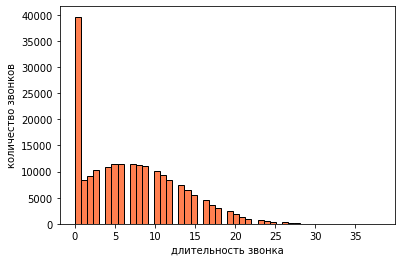

In [34]:
calls['duration'].plot(kind='hist', color='coral', ec='black', bins=50)
plt.xlabel('длительность звонка')
plt.ylabel('количество звонков')

Хоть этих строк и большое количество, принятое решение выше менять не буду, так как считаю, что несостоявщиеся звонки не несут вклада в анализ требуемой задачи. Сделаю срез данных и продолжу работу с ним.

In [35]:
a = calls.shape[0]
calls = calls.loc[calls['duration'] != 0]
print('Количество отброшенных строк с нулевыми звонками: {}'.format(a - calls.shape[0]))

Количество отброшенных строк с нулевыми звонками: 39613


Text(0, 0.5, 'количество звонков')

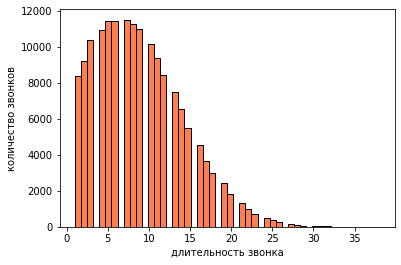

In [36]:
calls['duration'].plot(kind='hist', color='coral', ec='black', bins=50)
plt.xlabel('длительность звонка')
plt.ylabel('количество звонков')

Теперь посмотрю на нулевые интернет-сессии

In [37]:
internet_null = internet.query('mb_used == 0')
print('Количество нулевых интернет-сессий: {}'.format(internet_null['mb_used'].count()))

Количество нулевых интернет-сессий: 19598


Text(0, 0.5, 'количество сессий')

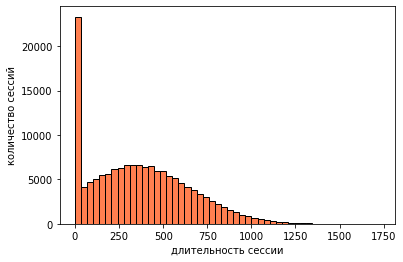

In [38]:
internet['mb_used'].plot(kind='hist', color='coral', ec='black', bins=50)
plt.xlabel('длительность сессии')
plt.ylabel('количество сессий')

Похожая картина, аналогично срежу не нужные данные

In [39]:
a = internet.shape[0]
internet = internet.loc[internet['mb_used'] != 0]
print('Количество отброшенных строк с нулевыми интернет-сессиями: {}'.format(a - internet.shape[0]))

Количество отброшенных строк с нулевыми интернет-сессиями: 19598


Text(0, 0.5, 'количество сессий')

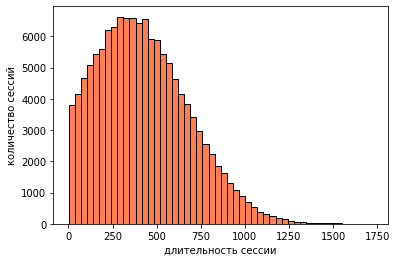

In [40]:
internet['mb_used'].plot(kind='hist', color='coral', ec='black', bins=50)
plt.xlabel('длительность сессии')
plt.ylabel('количество сессий')

#### 2.5 Посчитать количество сделанных звонков и израсходованных минут разговора по месяцам<a id="step2.5"></a> 

Прежде, чем считать количество звонков и израсходованных минут по месяцам, добавлю в таблицу со звонками год и месяц.

In [41]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
calls.head()

,id,call_date,duration,user_id,month,year
2,1000_2,2018-06-11,3,1000,6,2018
3,1000_3,2018-09-21,14,1000,9,2018
4,1000_4,2018-12-15,6,1000,12,2018
7,1000_7,2018-08-22,19,1000,8,2018
8,1000_8,2018-09-15,19,1000,9,2018


Теперь произведу подсчеты

In [42]:
calls['year'].unique()

array([2018])

Данные представлены только за один 2018 год, поэтому группировать по году не нужно. Сгруппирую по пользователю и месяцу, посчитаю количество и суммарную длительность звонков, сохраню в отдельную таблицу.

In [43]:
calls_sum_count = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
calls_sum_count

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
...              ...    ...
1498    10        30  247.0
1499    9          8   70.0
        10        44  449.0
        11        62  612.0
        12        56  492.0

[3168 rows x 2 columns]

#### 2.6 Посчитать количество отправленных сообщений по месяцам<a id="step2.6"></a> 

In [44]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
messages.head()

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018


In [45]:
messages['year'].unique()

array([2018])

In [46]:
messages_count = messages.groupby(['user_id', 'month'])['id'].count()
messages_count

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
                  ..
1498     10       42
1499     9        11
         10       48
         11       59
         12       66
Name: id, Length: 2717, dtype: int64

#### 2.7 Посчитать объем израсходованного интернет-трафика по месяцам<a id="step2.7"></a> 

In [47]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month,year
0,0,1000_0,113,2018-11-25,1000,11,2018
1,1,1000_1,1053,2018-09-07,1000,9,2018
2,2,1000_2,1198,2018-06-25,1000,6,2018
3,3,1000_3,551,2018-08-22,1000,8,2018
4,4,1000_4,303,2018-09-24,1000,9,2018


In [48]:
internet['year'].unique()

array([2018])

In [49]:
internet_sum = internet.groupby(['user_id', 'month'])['mb_used'].sum()
internet_sum

user_id  month
1000     5         2256.0
         6        23257.0
         7        14016.0
         8        14070.0
         9        14581.0
                   ...   
1498     10       20604.0
1499     9         1848.0
         10       17809.0
         11       17984.0
         12       13077.0
Name: mb_used, Length: 3201, dtype: float64

#### 2.8 Посчитать помесячную выручку с каждого пользователя<a id="step2.8"></a> 

Склею в одну таблицу полученные данные в предыдущих пунктах, воспользуюсь функцией concat() с параметром axis=1, так как хочу получить датафрейм.

In [50]:
data = pd.concat([calls_sum_count, messages_count, internet_sum], axis=1)
data = data.reset_index()
data

,user_id,month,count,sum,id,mb_used
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0
3210,1499,9,8.0,70.0,11.0,1848.0
3211,1499,10,44.0,449.0,48.0,17809.0
3212,1499,11,62.0,612.0,59.0,17984.0


Переименую столбцы, чтобы не запутаться далее.

In [51]:
data.set_axis(['user_id', 'month', 'calls_count', 'calls_sum', 'messages_count', 'internet_sum'], axis = 'columns', inplace = True)
data.head(15)

,user_id,month,calls_count,calls_sum,messages_count,internet_sum
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0
5,1000,10,44.0,350.0,73.0,14717.0
6,1000,11,37.0,338.0,58.0,14768.0
7,1000,12,38.0,333.0,70.0,9827.0
8,1001,11,45.0,430.0,NaN,18452.0
9,1001,12,47.0,414.0,NaN,14053.0


Появились пропущенные значения. Пропуски говорят о том, что, например, пользователем 1001 не было отправлено ни одного сообщения в ноябре. В данном случае логично заменить пропуски нулями.

In [52]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls_count       3214 non-null float64
calls_sum         3214 non-null float64
messages_count    3214 non-null float64
internet_sum      3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


Пропуски заменены, теперь добавлю информацию о пользователях

In [53]:
data = data.merge(users, on='user_id', how='left')
data

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


Переименую столбец с названием тарифа, чтобы далее добавить инфо о тарифах в основной датасет

In [54]:
data.set_axis([
    'user_id', 'month', 'calls_count', 
    'calls_sum', 'messages_count', 
    'internet_sum', 'age', 
    'churn_date', 'city', 
    'first_name', 'last_name', 
    'reg_date', 'tariff_name'], axis = 'columns', inplace = True)
data.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


И добавлю информацию о тарифах

In [55]:
data = data.merge(tariffs, on='tariff_name', how='left')
data.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Вычислю остатки или перерасходы по включенным в тариф пакетам на звонки, сообщения и трафик. Если полученное значение отрицательное, то пакет не израсходован. Если положительное, то нужно будет посчитать стоимость перерасхода. При этом превышенный трафик оплачивается за гигабайт, поэтому перерасход переведу из Мб в Гб и округлю вверх до целого.

In [56]:
data['free_minutes'] = data['calls_sum'] - data['minutes_included']
data['free_messages'] = data['messages_count'] - data['messages_included']
data['free_internet'] = (data['internet_sum'] - data['mb_per_month_included']) / 1024
data['free_internet'] = data['free_internet'].apply(np.ceil)
data

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,free_minutes,free_messages,free_internet
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-27.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-7.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-16.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-16.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,50,15360,500,550,200,3,3,-253.0,-8.0,6.0
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,-430.0,-39.0,-13.0
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,-51.0,-2.0,3.0
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,112.0,9.0,3.0


Теперь нужно заменить отрицательные значения на нули, так как фактически минусовой перерасход пакетов это не перерасход, а наоборот недоиспользованный лимит, входящий в абонентскую плату. Напишу функцию, которая будет проверять значение и в случае отрицательности заменять его на ноль, а в противном случае оставлять как есть.

In [57]:
def change(column):
    if column < 0:
        return 0
    else:
        return column

data['free_minutes'] = data['free_minutes'].apply(change)
data['free_messages'] = data['free_messages'].apply(change)
data['free_internet'] = data['free_internet'].apply(change)

data

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,free_minutes,free_messages,free_internet
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,50,15360,500,550,200,3,3,0.0,0.0,6.0
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,0.0,0.0,3.0
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,112.0,9.0,3.0


Наконец, можно вычислить помесячную выручку от каждого пользователя

In [58]:
data['revenue'] = data['free_minutes'] * data['rub_per_minute'] + data['free_messages'] * data['rub_per_message'] + data['free_internet'] * data['rub_per_gb'] + data['rub_monthly_fee']
data.sample(20)

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,free_minutes,free_messages,free_internet,revenue
1910,1300,12,74.0,623.0,183.0,35378.0,40,NaT,Москва,Тихон,...,30720,3000,1950,150,1,1,0.0,0.0,5.0,2700.0
1587,1250,8,47.0,402.0,40.0,12076.0,20,NaT,Смоленск,Лия,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
2238,1355,8,36.0,349.0,14.0,21926.0,33,2018-11-27,Киров,Сара,...,15360,500,550,200,3,3,0.0,0.0,7.0,1950.0
3078,1477,9,81.0,751.0,55.0,18964.0,70,NaT,Набережные Челны,Геральд,...,15360,500,550,200,3,3,251.0,5.0,4.0,2118.0
149,1021,8,133.0,1000.0,93.0,17498.0,61,NaT,Краснодар,Святослав,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1175,1183,10,48.0,421.0,31.0,11904.0,20,NaT,Владивосток,Снежана,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
1958,1308,11,19.0,197.0,31.0,11681.0,52,NaT,Москва,Инесса,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
1573,1248,8,79.0,667.0,0.0,22612.0,51,NaT,Москва,Анатолий,...,15360,500,550,200,3,3,167.0,0.0,8.0,2651.0
785,1121,12,52.0,531.0,47.0,14703.0,62,NaT,Белгород,Марта,...,15360,500,550,200,3,3,31.0,0.0,-0.0,643.0
1428,1224,11,54.0,425.0,0.0,21129.0,58,NaT,Магнитогорск,Ахмет,...,15360,500,550,200,3,3,0.0,0.0,6.0,1750.0


In [59]:
data_revenue = data.pivot_table(index = ['tariff_name'], values = ['revenue'], aggfunc=['sum'])
data_revenue.reset_index(level=0, inplace=True)
data_revenue.columns = ['тариф','выручка в рублях за год']
data_revenue

,тариф,выручка в рублях за год
0,smart,2885751.0
1,ultra,2040000.0


#### 2.9 Итоги<a id="step2.9"></a> 

Во втором разделе мною была проделана предобработка данных. Заменены типы данных на корректные в 15 столбцах. Удалены строки со звонками и интернет-сессиями нулевой длительности. Также произведены все необходимые для дальнейшего анализа расчеты, включая выручку, принесенную каждым пользователем за каждый месяц. Все полученные данные собраты в один датасет. Тариф smart принес больше выручки за год.

### 3. Анализ данных. Описание поведения клиента<a id="step3"></a> 

#### 3.1 Сколько минут, смс и интернет-трафика требуется пользователям каждого тарифа в месяц<a id="step3.1"></a> 

In [60]:
data_ultra = data[data['tariff_name'] == 'ultra']
data_smart = data[data['tariff_name'] == 'smart']

In [61]:
data_cost_ultra = data_ultra.pivot_table(index = ['user_id'], values = ['calls_sum', 'messages_count', 'internet_sum'], aggfunc=['mean'])
data_cost_ultra.reset_index(level=0, inplace=True)
data_cost_ultra.columns = ['пользователь','кол-во минут в месяц','объем трафика','кол-во сообщений в месяц']
data_cost_ultra

,пользователь,кол-во минут в месяц,объем трафика,кол-во сообщений в месяц
0,1000,320.750000,13436.500000,62.0
1,1003,764.400000,11465.800000,76.0
2,1004,123.375000,18646.500000,149.0
3,1013,468.000000,15272.500000,21.0
4,1016,61.000000,13417.000000,71.0
...,...,...,...,...
143,1476,467.111111,16714.333333,5.0
144,1485,584.000000,23447.000000,155.0
145,1491,513.333333,17956.888889,48.0
146,1493,372.000000,27233.500000,47.0


In [62]:
data_cost_smart = data_smart.pivot_table(index = ['user_id'], values = ['calls_sum', 'messages_count', 'internet_sum'], aggfunc=['mean'])
data_cost_smart.reset_index(level=0, inplace=True)
data_cost_smart.columns = ['пользователь','кол-во минут в месяц','объем трафика','кол-во сообщений в месяц']
data_cost_smart

,пользователь,кол-во минут в месяц,объем трафика,кол-во сообщений в месяц
0,1001,422.000000,16252.500000,0.0
1,1002,216.714286,16597.571429,10.0
2,1005,550.416667,8317.750000,46.0
3,1006,318.272727,14945.000000,0.0
4,1007,486.555556,14643.555556,25.0
...,...,...,...,...
345,1494,389.200000,15420.400000,0.0
346,1496,498.666667,22605.750000,39.0
347,1497,468.666667,15208.666667,17.0
348,1498,323.250000,18631.500000,42.0


In [63]:
data_cost_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
пользователь,148.0,1263.047297,143.031861,1000.0,1146.750000,1276.500000,1379.250000,1495.000000
кол-во минут в месяц,148.0,527.821819,281.786359,0.0,325.437500,514.541667,746.972222,1179.363636
объем трафика,148.0,19592.839001,8318.753942,0.0,14504.429545,18715.550000,25906.544643,38502.000000
кол-во сообщений в месяц,148.0,54.030743,46.366246,0.0,17.000000,45.500000,84.250000,192.000000


In [64]:
data_cost_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
пользователь,350.0,1243.771429,145.033439,1001.000000,1119.500000,1235.500000,1371.500000,1499.0
кол-во минут в месяц,350.0,419.634803,145.031543,0.000000,316.886364,425.062500,519.508333,891.5
объем трафика,350.0,16201.387920,3583.640810,5391.181818,13934.035714,16272.357143,18620.263889,27321.0
кол-во сообщений в месяц,350.0,32.352078,26.512448,0.000000,11.000000,27.750000,48.000000,118.0


Получили данные 148 пользователей тарифа Ультра и 350 пользователей тарифа Смарт. Пользователи тарифа Смарт часто превышают лимит пакета минут (более 25% пользователей) и лимит пакета трафика (более 50% пользователей). Лимит пакет смс при этом ни у одного пользователя не превышен. Пользователи тарифа Ультра не превышают лимит пакета минут и сообщений, при этом большинство не используют и 20% пакетов. У менее, чем 25% пользователей есть превышение по использованию трафика. По полученным данным выше о выручке можно сказать, что тариф Ультра для компании более выгодный, не смотря на то, что пользователи тарифа Смарт часто превышают лимиты и докупают дополнительные минуты и трафик. 

#### 3.2 Подсчет среднего кол-ва, дисперсии и стандартного отклонения<a id="step3.2"></a> 

In [65]:
print('Тариф Smart')
print()
print('Кол-во минут в месяц')
print('Среднее: {:.2f}'.format(data_smart['calls_sum'].mean()))
print('Дисперсия: {:.2f}'.format(data_smart['calls_sum'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_smart['calls_sum'].std()))
print()
print('Объем трафика')
print('Среднее: {:.2f}'.format(data_smart['internet_sum'].mean()))
print('Дисперсия: {:.2f}'.format(data_smart['internet_sum'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_smart['internet_sum'].std()))
print()
print('Кол-во сообщений в месяц')
print('Среднее: {:.2f}'.format(data_smart['messages_count'].mean()))
print('Дисперсия: {:.2f}'.format(data_smart['messages_count'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_smart['messages_count'].std()))

Тариф Smart

Кол-во минут в месяц
Среднее: 417.93
Дисперсия: 36219.32
Стандартное отклонение: 190.31

Объем трафика
Среднее: 16229.19
Дисперсия: 34545911.13
Стандартное отклонение: 5877.58

Кол-во сообщений в месяц
Среднее: 33.38
Дисперсия: 796.81
Стандартное отклонение: 28.23


In [66]:
print('Тариф Ultra')
print()
print('Кол-во минут в месяц')
print('Среднее: {:.2f}'.format(data_ultra['calls_sum'].mean()))
print('Дисперсия: {:.2f}'.format(data_ultra['calls_sum'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_ultra['calls_sum'].std()))
print()
print('Объем трафика')
print('Среднее: {:.2f}'.format(data_ultra['internet_sum'].mean()))
print('Дисперсия: {:.2f}'.format(data_ultra['internet_sum'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_ultra['internet_sum'].std()))
print()
print('Кол-во сообщений в месяц')
print('Среднее: {:.2f}'.format(data_ultra['messages_count'].mean()))
print('Дисперсия: {:.2f}'.format(data_ultra['messages_count'].var()))
print('Стандартное отклонение: {:.2f}'.format(data_ultra['messages_count'].std()))

Тариф Ultra

Кол-во минут в месяц
Среднее: 526.62
Дисперсия: 100873.63
Стандартное отклонение: 317.61

Объем трафика
Среднее: 19486.90
Дисперсия: 101935621.05
Стандартное отклонение: 10096.32

Кол-во сообщений в месяц
Среднее: 49.36
Дисперсия: 2285.27
Стандартное отклонение: 47.80


Выведу полученные данные в наглядную сводную

In [67]:
statistica = data.pivot_table(index = ['tariff_name'], values = ['calls_sum', 'messages_count', 'internet_sum'], aggfunc=['mean', 'var', 'std']).round(2)
statistica

mean                                    var                \
            calls_sum internet_sum messages_count  calls_sum  internet_sum   
tariff_name                                                                  
smart          417.93     16229.19          33.38   36219.32  3.454591e+07   
ultra          526.62     19486.90          49.36  100873.63  1.019356e+08   

                                 std                              
            messages_count calls_sum internet_sum messages_count  
tariff_name                                                       
smart               796.81    190.31      5877.58          28.23  
ultra              2285.27    317.61     10096.32          47.80

#### 3.3 Построение гистограмм и описание распределения<a id="step3.3"></a> 

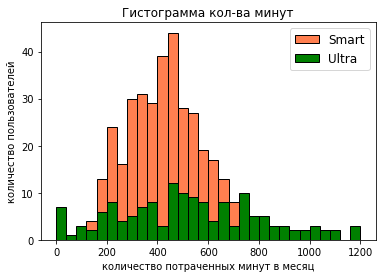

In [68]:
data_cost_smart['кол-во минут в месяц'].plot(kind='hist', bins=30, range = (0, 1200), color='coral', ec='black', title='Гистограмма кол-ва минут')
data_cost_ultra['кол-во минут в месяц'].plot(kind='hist', bins=30, range = (0, 1200), color='green', ec='black', title='Гистограмма кол-ва минут')
plt.xlabel('количество потраченных минут в месяц')
plt.ylabel('количество пользователей')
plt.legend(['Smart', 'Ultra'], prop={'size':12})

На тарифе Smart в основном пользователи наговаривают за месяц 250-550 минут. Среднее равно 417 минутам. То есть получаем, что при выборе тарифа Smart пользователи регулярно почти выговаривают полный пакет в 500 минут, включенный в абонентскую плату. С тарифом Ultra дела обстоят иначе. В исследуемых данных нет пользователей, которые бы выговорили весь пакет или хотя бы были к этому близки. Есть даже такие, кто практически не пользуется звонками. Из тех, кто разговаривает, в среднем наговаривают всего 514 минут из 3000, предложенных по тарифу.

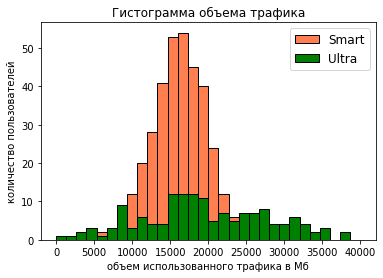

In [69]:
data_cost_smart['объем трафика'].plot(kind='hist', bins=30, range = (0, 40000), color='coral', ec='black', title='Гистограмма объема трафика')
data_cost_ultra['объем трафика'].plot(kind='hist', bins=30, range = (0, 40000), color='green', ec='black', title='Гистограмма объема трафика')
plt.xlabel('объем использованного трафика в Мб')
plt.ylabel('количество пользователей')
plt.legend(['Smart', 'Ultra'], prop={'size':12})

На тарифе Smart большая часть пользователей использует более 15 Гб трафика. Среднее равно 15,8 Гб. То есть получаем, что при выборе тарифа Smart пользователям не хватает включенного в тариф пакета интернета. С тарифом Ultra снова дела обстоят иначе. В исследуемых данных не значительное количество пользователей, которые бы израсходовали весь пакет в 30 Гб. В среднем тратят 19 Гб интернет трафика за месяц.

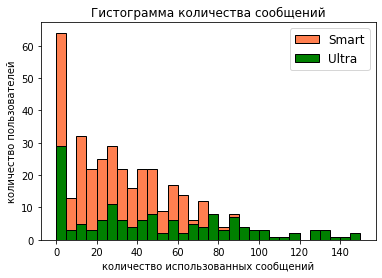

In [70]:
data_cost_smart['кол-во сообщений в месяц'].plot(kind='hist', bins=30, range = (0, 150), color='coral', ec='black', title='Гистограмма количества сообщений')
data_cost_ultra['кол-во сообщений в месяц'].plot(kind='hist', bins=30, range = (0, 150), color='green', ec='black', title='Гистограмма количества сообщений')
plt.xlabel('количество использованных сообщений')
plt.ylabel('количество пользователей')
plt.legend(['Smart', 'Ultra'], prop={'size':12})

Количество используемых смс в обоих тарифах не большое, лимиты никогда не превышаются. На тарифе Smart в среднем за месяц отправляют 33 смс, на тарифе Ultra - 49. На тарифе Smart большое количество пользователей совсем не пользуется смс.

### 4. Проверка гипотез<a id="step4"></a> 

#### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается<a id="step4.1"></a> 

H0 - Нулевая гипотеза - Средняя выручка пользователей тарифа Smart равна средней выручке пользователей тарифа Ultra.

H1 - Альтернативная гипотеза - Средняя выручка пользователей тарифа Smart не равна средней выручке пользователей тарифа Ultra.

Критический уровень статистической значимости возьму равным 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применю метод scipy.stats.ttest_ind.
Вначале сделаю нужные выборки из данных - средние месячные выручки по тарифам.

In [71]:
revenue_smart = data_ultra['revenue']
revenue_ultra = data_smart['revenue']

In [72]:
print('Средняя выручка Smart: ',pd.Series(revenue_smart).mean())
print('Средняя выручка Ultra: ',pd.Series(revenue_ultra).mean())
alpha = 0.05

results = st.ttest_ind(revenue_smart, revenue_ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка Smart:  2071.0659898477156
Средняя выручка Ultra:  1294.6393001345896
p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Выручка по двум тарифам сильно различается. Исходя только из проверки гипотезы нельзя сказать, чья выручка больше, — можно только сказать, что они отличаются. Но, посчитав среднюю выручку для обоих тарифов, можно сказать, что cредняя выручка с тарифа Ultra выше, чем с тарифа Smart.

#### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов<a id="step4.2"></a> 

H0 - Нулевая гипотеза - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 - Альтернативная гипотеза - Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Критический уровень статистической значимости возьму равным 0.05.

Вначале сделаю нужные выборки из данных - средние месячные выручки пользователей из Москвы и из других регионов.

In [73]:
revenue_moscow = data[data['city'] == 'Москва']['revenue']
revenue_other = data[data['city'] != 'Москва']['revenue']

In [74]:
print('Средняя выручка от пользователей из Москвы: ',pd.Series(revenue_moscow).mean())
print('Средняя выручка от пользователей из других регионов: ',pd.Series(revenue_other).mean())
alpha = 0.05

results = st.ttest_ind(revenue_moscow, revenue_other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка от пользователей из Москвы:  1550.8052373158755
Средняя выручка от пользователей из других регионов:  1528.3169419900116
p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Выручка от пользователей из Москвы и других регионов не сильно различается. Исходя только из проверки гипотезы можно сказать, чья выручка почти одинаковая и входит в диапазон статистической значимости. Но, посчитав среднюю выручку от пользователей из Москвы и пользователей из других регионов, можно сказать, что выручки почти не отличаются.

#### 4.3 Средняя выручка пользователей тарифом Smart  из Москвы отличается от выручки пользователей тарифом Smart из других регионов<a id="step4.3"></a> 

H0 - Нулевая гипотеза - Средняя выручка пользователей тарифом Smart из Москвы равна средней выручке пользователей тарифом Smart из других регионов.

H1 - Альтернативная гипотеза - Средняя выручка пользователей тарифом Smart из Москвы не равна средней выручке пользователей тарифом Smart из других регионов.

Критический уровень статистической значимости возьму равным 0.05.

Вначале сделаю нужные выборки из данных - средние месячные выручки пользователей тарифом Smart из Москвы и из других регионов.

In [75]:
revenue_moscow_smart = data_smart[data_smart['city'] == 'Москва']['revenue']
revenue_other_smart = data_smart[data_smart['city'] != 'Москва']['revenue']

In [76]:
print('Средняя выручка от пользователей Smart из Москвы: ',pd.Series(revenue_moscow_smart).mean())
print('Средняя выручка от пользователей Smart из других регионов: ',pd.Series(revenue_other_smart).mean())
alpha = 0.05

results = st.ttest_ind(revenue_moscow_smart, revenue_other_smart) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка от пользователей Smart из Москвы:  1245.0569948186528
Средняя выручка от пользователей Smart из других регионов:  1305.0238741182854
p-значение: 0.19196326570657848
Не получилось отвергнуть нулевую гипотезу


Выручка от пользователей тарифом Smart из Москвы и других регионов не сильно различается. Исходя только из проверки гипотезы можно сказать, чья выручка почти одинаковая и входит в диапазон статистической значимости. Но, посчитав среднюю выручку от пользователей тарифа Smart из Москвы и пользователей тарифа Smart из других регионов, можно сказать, что выручки почти не отличаются.

#### 4.4 Средняя выручка пользователей тарифом Ultra  из Москвы отличается от выручки пользователей тарифом Ultra из других регионов<a id="step4.4"></a> 

H0 - Нулевая гипотеза - Средняя выручка пользователей тарифом Ultra из Москвы равна средней выручке пользователей тарифом Ultra из других регионов.

H1 - Альтернативная гипотеза - Средняя выручка пользователей тарифом Ultra из Москвы не равна средней выручке пользователей тарифом Ultra из других регионов.

Критический уровень статистической значимости возьму равным 0.05.

Вначале сделаю нужные выборки из данных - средние месячные выручки пользователей тарифом Ultra из Москвы и из других регионов.

In [77]:
revenue_moscow_ultra = data_ultra[data_ultra['city'] == 'Москва']['revenue']
revenue_other_ultra = data_ultra[data_ultra['city'] != 'Москва']['revenue']

In [78]:
print('Средняя выручка от пользователей Ultra из Москвы: ',pd.Series(revenue_moscow_ultra).mean())
print('Средняя выручка от пользователей Ultra из других регионов: ',pd.Series(revenue_other_ultra).mean())
alpha = 0.05

results = st.ttest_ind(revenue_moscow_ultra, revenue_other_ultra) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка от пользователей Ultra из Москвы:  2075.3333333333335
Средняя выручка от пользователей Ultra из других регионов:  2069.8026315789475
p-значение: 0.8475623384854951
Не получилось отвергнуть нулевую гипотезу


Выручка от пользователей тарифом Ultra из Москвы и других регионов не сильно различается. Исходя только из проверки гипотезы можно сказать, чья выручка почти одинаковая и входит в диапазон статистической значимости. Но, посчитав среднюю выручку от пользователей тарифа Ultra из Москвы и пользователей тарифа Ultra из других регионов, можно сказать, что выручки почти не отличаются.

### 5. Общие выводы<a id="step5"></a> 

#### Пользователи больше предпочитают тариф Smart.

#### Чаще всего расходы сверх абонентской платы происходят на тарифе Smart, что приносит дополнительную прибыль, но и говорит о том, что пользователям не хватает заложенных в тариф лимитов, особенно это касается интернет-трафика.

#### Самым прибильным сегментом является - интернет, причем в обоих тарифах.

#### Общая годовая выручка с тарифа Smart больше чем с тарифа Ultra.

#### Пользователи тарифа Ultra практически не превышают лимитов, кроме интернет-трафика.

#### Пользователи обоих тарифов практически не пользуются отправкой смс.

#### Пользователи тарифа Ultra не превышают лимит по звонкам и смс.

#### Отличие средней выручки из Москвы и других регионов незначительное, это относится и к сравнению тарифов по Москве и регионам.

#### Если говорить о том, какой тариф лучше для пользователя, то я бы предложенным двум предпочла третий - нечто промежуточное. Те перерасходы, которые получаются у пользователей Smart можно заложить в абонентскую плату, тем самым увеличить лимит пакета звонков и интернет-трафика. Ведь клиент уже платит эту сумму, значит готов. В то время, как у тарифа Ultra достаточно высокая абонентская плата за часто не используемые пакеты смс и звонков.